In [0]:
# Reference: https://m.blog.naver.com/samsjang/220955881668

In [0]:
import numpy as np

In [0]:
class Perceptron:
  # eta: learing rate / n_iter: iteration 횟수 / thresholds: 임계값 or 역치 
  def __init__(self, thresholds=0.0, eta=0.01, n_iter=10):
    self.thresholds = thresholds
    self.eta = eta
    self.n_iter = n_iter

  # training a model
  # 트레이닝 데이터 X와 실제 결과값 y를 인자로 받아 머신러닝을 수행하는 함수 
  # 일반적으로 트레이닝 데이터를 X(대문자), 실제 결과값을 y(소문자)로 표현 
  def fit(self, X, y):

    # 가중치(weight)를 numpy array 로 선언 
    # X.shape[1]은 트레이닝 데이터의 입력값 개수 
    # 예를 들어 X가 4 * 2 배열의 경우 X.shape[1]은 2가 됨 
    # 이 경우 self.w_는 np.zeros(3)이 되고 실제 값은 numpy array [0., 0., 0]이 됨 
    self.w_ = np.zeros(1+X.shape[1])

    # 머신러닝 반복 회수에 따라 퍼셉트론의 예측값과 실제값이 다른 오류 횟수를 저장하기 위한 변수 
    self.errors_ = []

    # self.n_iter 에 정의된 숫자만큼 반복 
    # for 뒤에 _ 는 아무 의미없는 숫자이며 특정 횟수만 반복만 하면 되기 때문에 이렇게 선언 
    for _ in range(self.n_iter):

      # 초기 오류 횟수를 0으로 선언 
      errors = 0

      # 트레이닝 데이터 셋트 X와 결과값 y를 하나씩 추출해서 xi와 target에 넣음
      # xi는 하나의 트레이닝 데이터의 모든 입력값 x1 ~ xn까지를 의미하여 x0는 1으로 고정되어 있음 
      for xi, target in zip(X, y):

        # update는 실제 결과값과 예측값에 대한 활성 함수 리턴값 
        # 실제 결과값과 예측값이 동일하면 update는 0이 됨 
        # 따라서, 트레이닝 데이터의 xi의 값에 곱해지는 가중치에 update를 단순히 더함으로써 가중치를 업데이트할 수 있는데
        # 결과값과 예측값에 대한 활성 함수 리턴값이 같아질 경우 0을 더하는 꼴이라 가중치의 변화가 없을 것이고 
        # 다를 경우 0이 아닌 유효한 값이 더해져서 가중치가 업데이트가 될 것이기 때문이다. 
        # self_w_[0]에는 x0가 1이므로 update만 더하면 됨 
        update = self.eta * (target - self.predict(xi))
        self.w_[1:] += update * xi
        self.w_[0] += update 

        # update의 값이 0이 아닌 경우 erros의 값을 1 증가시키고 다은 트레이닝 데이터로 넘어감 
        errors += int(update!=0.0)

      # 모든 트레이닝 데이터에 대해 1회 학습 (epoch = 1)이 끝나면 self.erros_에 오류 횟수를 추가한 후 
      # 가중치를 화면에 출력하고 다음 학습을 다시 반복함 
      self.errors_.append(errors)
      print(self.w_)

    return self

  # y = W*X + b
  # np.dot은 벡터 x,y 의 내적 혹은 행렬 x, y의 곱을 리턴 
  
  def net_input(self, X):
    return np.dot(X, self.w_[1:]) + self.w_[0]

  # 입력값이 역치보다 크면 1을 아니면 -1을 리턴
  def predict(self, X):
    return np.where(self.net_input(X) > self.thresholds, 1, -1)

In [5]:
# 실행부 
X = np.array([[0,0], [0,1], [1,0], [1,1]])
y = np.array([-1, -1, -1, 1])

ppn = Perceptron(eta=0.1)
ppn.fit(X, y)
print(ppn.errors_)

[0.2 0.2 0.2]
[0.  0.4 0.2]
[-0.2  0.4  0.2]
[-0.2  0.4  0.4]
[-0.4  0.4  0.2]
[-0.4  0.4  0.2]
[-0.4  0.4  0.2]
[-0.4  0.4  0.2]
[-0.4  0.4  0.2]
[-0.4  0.4  0.2]
[1, 3, 3, 2, 1, 0, 0, 0, 0, 0]


In [0]:
import matplotlib.pyplot as plt

Text(0.5, 0, 'Epochs')

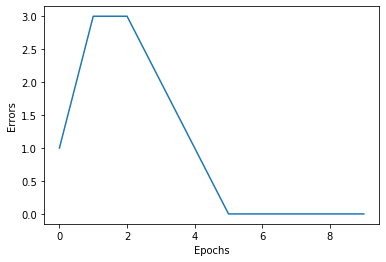

In [7]:
# 에러 횟수의 변화를 시각화 
plt.plot(ppn.errors_)
plt.ylabel("Errors")
plt.xlabel("Epochs")